# Capstone 2 on Airline Delays: Exploratory Data Analysis

Every traveller hates flight delays and cancellations. How can we avoid this as much as possible? For this exploratory data analysis, we'll be looking at flights departing from Raleigh-Durham International Airport, NC over the period from July 2021 to June 2022. I have downloaded the data from the OST (US Bureau of Transportation Statistics) website, cleaned and preprocessed it, and stored it in 'RDU_departures.csv.' 

I'd like to find out what contributes to a flight being delayed by more than 15 minutes ('DEP_DEL15' = 'Departure Delay') or being cancelled altogether ('CANCELLED' = 'Cancelled').

In [1]:
#Import necessary packages and load dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_RDU = pd.read_csv('RDU_departures.csv')

In [2]:
# I always find that it's useful to have a peek of the df

df_RDU.head()

# due to subsetting another larger dataframe,
# we have a reduplicated index, 
# let's get rid of that

,Unnamed: 0,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,CARRIER,FL_NUM,ORIGIN,ORIGIN_CITY,...,CANCELLED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,11,3,7,2,Friday,2021-07-02,SkyWest Airlines,3242,RDU,"Raleigh/Durham, NC",...,Not Cancelled,150.0,165.0,107.0,646.0,0.0,0.0,0.0,0.0,33.0
1,14,3,7,6,Tuesday,2021-07-06,SkyWest Airlines,3242,RDU,"Raleigh/Durham, NC",...,Not Cancelled,150.0,164.0,97.0,646.0,NaN,NaN,NaN,NaN,NaN
2,22,3,7,13,Tuesday,2021-07-13,SkyWest Airlines,3242,RDU,"Raleigh/Durham, NC",...,Not Cancelled,150.0,147.0,99.0,646.0,0.0,0.0,0.0,0.0,70.0
3,24,3,7,5,Monday,2021-07-05,SkyWest Airlines,3242,RDU,"Raleigh/Durham, NC",...,Not Cancelled,150.0,126.0,99.0,646.0,NaN,NaN,NaN,NaN,NaN
4,26,3,7,8,Thursday,2021-07-08,SkyWest Airlines,3242,RDU,"Raleigh/Durham, NC",...,Not Cancelled,150.0,161.0,127.0,646.0,0.0,0.0,0.0,0.0,84.0


In [3]:
df_RDU.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df_RDU.head()
# better!

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,CARRIER,FL_NUM,ORIGIN,ORIGIN_CITY,ORIGIN_STATE,...,CANCELLED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,3,7,2,Friday,2021-07-02,SkyWest Airlines,3242,RDU,"Raleigh/Durham, NC",North Carolina,...,Not Cancelled,150.0,165.0,107.0,646.0,0.0,0.0,0.0,0.0,33.0
1,3,7,6,Tuesday,2021-07-06,SkyWest Airlines,3242,RDU,"Raleigh/Durham, NC",North Carolina,...,Not Cancelled,150.0,164.0,97.0,646.0,NaN,NaN,NaN,NaN,NaN
2,3,7,13,Tuesday,2021-07-13,SkyWest Airlines,3242,RDU,"Raleigh/Durham, NC",North Carolina,...,Not Cancelled,150.0,147.0,99.0,646.0,0.0,0.0,0.0,0.0,70.0
3,3,7,5,Monday,2021-07-05,SkyWest Airlines,3242,RDU,"Raleigh/Durham, NC",North Carolina,...,Not Cancelled,150.0,126.0,99.0,646.0,NaN,NaN,NaN,NaN,NaN
4,3,7,8,Thursday,2021-07-08,SkyWest Airlines,3242,RDU,"Raleigh/Durham, NC",North Carolina,...,Not Cancelled,150.0,161.0,127.0,646.0,0.0,0.0,0.0,0.0,84.0


In [5]:
df_RDU.to_csv('RDU_departures.csv')

In [6]:
df_RDU['FL_DATE'] = df_RDU['FL_DATE'].astype('datetime64')

In [7]:
df_RDU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52645 entries, 0 to 52644
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   QUARTER              52645 non-null  int64         
 1   MONTH                52645 non-null  int64         
 2   DAY_OF_MONTH         52645 non-null  int64         
 3   DAY_OF_WEEK          52645 non-null  object        
 4   FL_DATE              52645 non-null  datetime64[ns]
 5   CARRIER              52645 non-null  object        
 6   FL_NUM               52645 non-null  int64         
 7   ORIGIN               52645 non-null  object        
 8   ORIGIN_CITY          52645 non-null  object        
 9   ORIGIN_STATE         52645 non-null  object        
 10  DEST                 52645 non-null  object        
 11  DEST_CITY            52645 non-null  object        
 12  DEST_STATE           52645 non-null  object        
 13  CRS_DEP_TIME         52645 non-

Let's start by getting a sense of how many flights there are by airline and how many of them get cancelled/delayed.

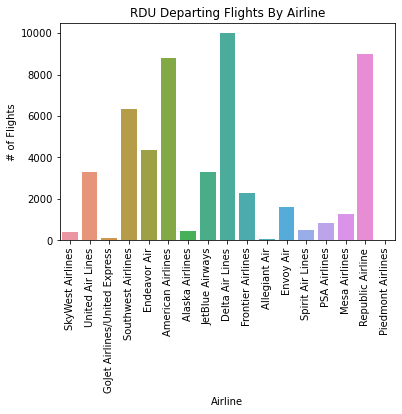

In [8]:
sns.countplot(data=df_RDU,
              x='CARRIER')
plt.xlabel('Airline')
plt.ylabel('# of Flights')
plt.title('RDU Departing Flights By Airline')
plt.tick_params(axis='x', rotation=90)
plt.show()

It's helpful to see the breakdown of departing flights by airline. Delta, American, Republic, and Southwest are all very popular. Knowing this, we won't penalize airlines who have a higher percentage of delayed flights but far fewer flights overall. 

Given this, let's look at cancellations/delays by airline.

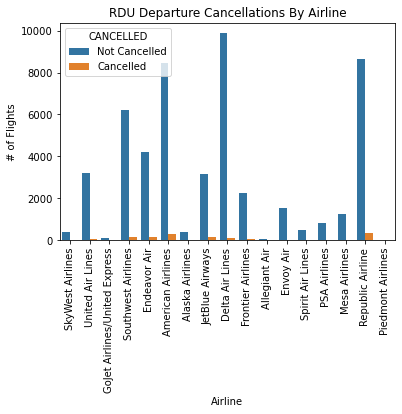

In [9]:
sns.countplot(data=df_RDU,
              x='CARRIER',
             hue='CANCELLED')
plt.xlabel('Airline')
plt.ylabel('# of Flights')
plt.title('RDU Departure Cancellations By Airline')
plt.tick_params(axis='x', rotation=90)
plt.show()

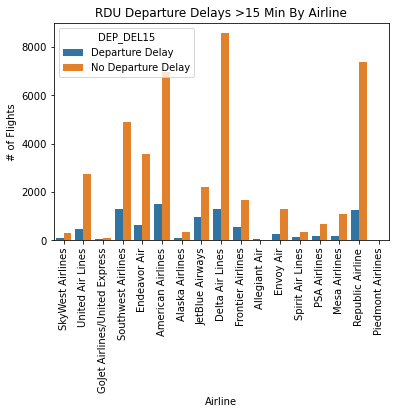

In [10]:
sns.countplot(data=df_RDU,
              x='CARRIER',
             hue='DEP_DEL15')
plt.xlabel('Airline')
plt.ylabel('# of Flights')
plt.title('RDU Departure Delays >15 Min By Airline')
plt.tick_params(axis='x', rotation=90)
plt.show()

I'm curious if these cancellations/delays are spread out by month/day of the week. Let's pick Southwest Airlines and take a look.

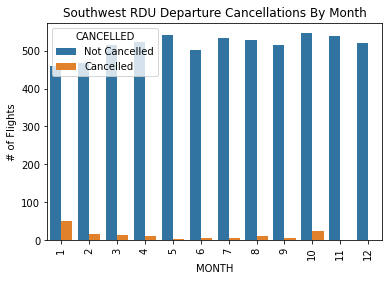

In [11]:
sns.countplot(data=df_RDU[df_RDU['CARRIER']=='Southwest Airlines'],
              x='MONTH',
             hue='CANCELLED')
plt.xlabel('MONTH')
plt.ylabel('# of Flights')
plt.title('Southwest RDU Departure Cancellations By Month')
plt.tick_params(axis='x', rotation=90)
plt.show()

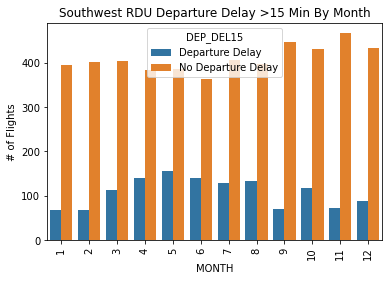

In [12]:
sns.countplot(data=df_RDU[df_RDU['CARRIER']=='Southwest Airlines'],
              x='MONTH',
             hue='DEP_DEL15')
plt.xlabel('MONTH')
plt.ylabel('# of Flights')
plt.title('Southwest RDU Departure Delay >15 Min By Month')
plt.tick_params(axis='x', rotation=90)
plt.show()

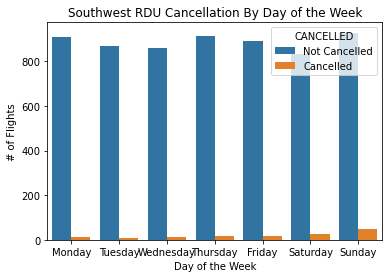

In [13]:
sns.countplot(data=df_RDU[df_RDU['CARRIER']=='Southwest Airlines'],
             x='DAY_OF_WEEK',
             order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                    'Friday', 'Saturday', 'Sunday'],
             hue='CANCELLED')
plt.xlabel('Day of the Week')
plt.ylabel('# of Flights')
plt.title('Southwest RDU Cancellation By Day of the Week')
plt.show()

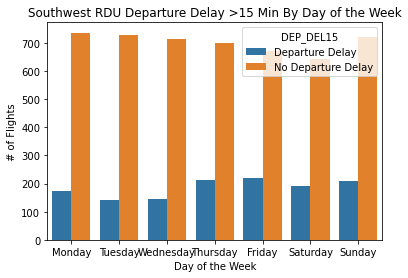

In [14]:
sns.countplot(data=df_RDU[df_RDU['CARRIER']=='Southwest Airlines'],
             x='DAY_OF_WEEK',
             order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                    'Friday', 'Saturday', 'Sunday'],
             hue='DEP_DEL15')
plt.xlabel('Day of the Week')
plt.ylabel('# of Flights')
plt.title('Southwest RDU Departure Delay >15 Min By Day of the Week')
plt.show()

All interesting. Southwest had the most cancelled flights in January and October, and on Sundays. It had the most flight delays of >15 min in May and Thursday, Friday, and Sunday.

# Subsetted dataframes

Since we are primarily interested in cancellations and delays, let's subset our dataset to explore these further.

In [15]:
df_cancelled = df_RDU[df_RDU['CANCELLED']=='Cancelled']
df_delayed = df_RDU[df_RDU['DEP_DEL15']=='Departure Delay']

In [16]:
# I want to get the # of flights cancelled each day
df_dates_cancelled = df_cancelled['FL_DATE'].value_counts()
df_dates_cancelled = df_dates_cancelled.reset_index()
df_dates_cancelled.rename(columns={'index':'FL_DATE', 'FL_DATE':'Number_Cancellations_Day'}, inplace=True)
pd.to_datetime(df_dates_cancelled['FL_DATE'])
df_dates_cancelled['FL_DATE']
df_cancelled = df_cancelled.merge(df_dates_cancelled, on='FL_DATE')

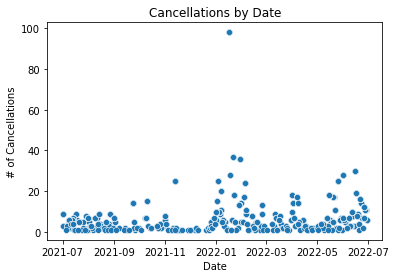

In [17]:
sns.scatterplot(data=df_cancelled,
               x='FL_DATE', y='Number_Cancellations_Day')
plt.title('Cancellations by Date')
plt.xlabel('Date')
plt.ylabel('# of Cancellations')
plt.show()

In [18]:
# Let's do the same to get the number of flights delayed each day
df_dates_delayed = df_delayed['FL_DATE'].value_counts()
df_dates_delayed = df_dates_delayed.reset_index()
df_dates_delayed.rename(columns={'index':'FL_DATE', 'FL_DATE':'Number_Delays_Day'}, inplace=True)
df_delayed = df_delayed.merge(df_dates_delayed, on='FL_DATE')

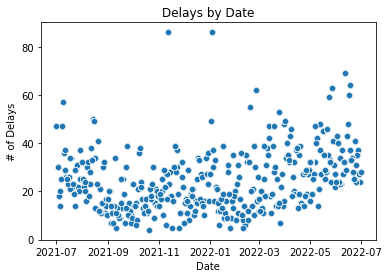

In [19]:
sns.scatterplot(data=df_delayed,
               x='FL_DATE', y='Number_Delays_Day')
plt.title('Delays by Date')
plt.xlabel('Date')
plt.ylabel('# of Delays')
plt.show()

Cancellations seem worst in January. Delays are fairly evenly spread but slightly better in the fall from Sept-Nov.

Now how about delays over the course of the day (by hour)?

In [20]:
# I just want the scheduled departure hour
df_cancelled['Dep_Hour'] = pd.to_datetime(df_cancelled['CRS_DEP_TIME']).dt.strftime('%H')
df_cancelled['Dep_Hour'] = df_cancelled['Dep_Hour'].astype(int)

# Now I want to calculate how many flights are cancelled each departure hour
df_hours_cancelled = df_cancelled['Dep_Hour'].value_counts()
df_hours_cancelled = df_hours_cancelled.reset_index()
df_hours_cancelled.rename(columns={'index':'Dep_Hour', 'Dep_Hour':'Number_Cancellations_Hour'}, inplace=True)
df_cancelled = df_cancelled.merge(df_hours_cancelled, on='Dep_Hour')

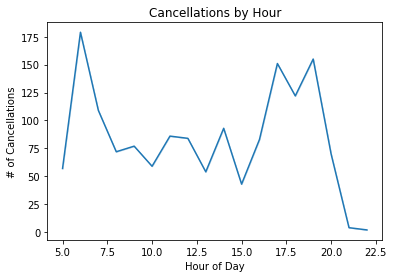

In [21]:
sns.lineplot(data=df_cancelled, x='Dep_Hour', y='Number_Cancellations_Hour')
plt.title('Cancellations by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('# of Cancellations')
plt.show()

In [22]:
# I just want the scheduled departure hour
df_delayed['Dep_Hour'] = pd.to_datetime(df_delayed['CRS_DEP_TIME']).dt.strftime('%H')
df_delayed['Dep_Hour'] = df_delayed['Dep_Hour'].astype(int)

# Now I want to calculate how many flights are cancelled each departure hour
df_hours_delayed = df_delayed['Dep_Hour'].value_counts()
df_hours_delayed = df_hours_delayed.reset_index()
df_hours_delayed.rename(columns={'index':'Dep_Hour', 'Dep_Hour':'Number_Delays_Hour'}, inplace=True)
df_delayed = df_delayed.merge(df_hours_delayed, on='Dep_Hour')

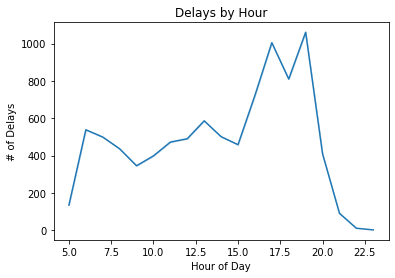

In [23]:
sns.lineplot(data=df_delayed, x='Dep_Hour', y='Number_Delays_Hour')
plt.title('Delays by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('# of Delays')
plt.show()

It looks like cancellations are worse early in the day around 6am and later in the day around 5-8pm. Delays are worst between 5-7pm.

How bad are the delays by carrier?

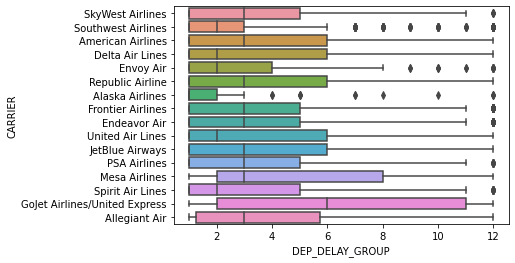

In [24]:
sns.boxplot(data=df_delayed,
           x='DEP_DELAY_GROUP', y='CARRIER')
plt.show()

We've explored two dependent variables (DEP_DEL15 and CANCELLATIONS) based on a number of features: month, day of week, flight date, carrier, and departure hour. There are a few other features that we could look at including destination (airport), scheduled elapsed time, and air time.